Decision Tree

In [207]:
from google.colab import files
upload = files.upload()

Saving smoking.csv to smoking (5).csv


In [208]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [209]:
data = pd.read_csv('smoking.csv')
data = data.head(5500)
data

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,6920,M,20,165,65,71.0,1.2,1.0,1.0,1.0,...,15.1,1.0,1.2,23.0,15.0,14.0,Y,0,Y,0
5496,6921,F,55,155,60,80.0,0.8,0.9,1.0,1.0,...,12.9,1.0,0.7,28.0,25.0,41.0,Y,0,Y,1
5497,6922,M,30,180,80,89.0,1.5,0.8,1.0,1.0,...,16.1,2.0,1.2,23.0,29.0,27.0,Y,0,N,1
5498,6924,F,60,165,65,81.0,0.3,1.0,1.0,1.0,...,13.8,1.0,1.0,21.0,16.0,17.0,Y,0,Y,0


In [210]:
data.shape

(5500, 27)

In [211]:
oral_dummies = pd.get_dummies(data.oral)
gender_dummies = pd.get_dummies(data.gender)
tarter_dummies = pd.get_dummies(data.tartar)

In [212]:
merged = pd.concat([data,oral_dummies,gender_dummies,tarter_dummies],axis='columns')
merged

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,Gtp,oral,dental caries,tartar,smoking,Y,F,M,N,Y
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,27.0,Y,0,Y,0,1,1,0,0,1
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,18.0,Y,0,Y,0,1,1,0,0,1
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,22.0,Y,0,N,1,1,0,1,1,0
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,18.0,Y,0,Y,0,1,0,1,0,1
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,22.0,Y,0,N,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,6920,M,20,165,65,71.0,1.2,1.0,1.0,1.0,...,14.0,Y,0,Y,0,1,0,1,0,1
5496,6921,F,55,155,60,80.0,0.8,0.9,1.0,1.0,...,41.0,Y,0,Y,1,1,1,0,0,1
5497,6922,M,30,180,80,89.0,1.5,0.8,1.0,1.0,...,27.0,Y,0,N,1,1,0,1,1,0
5498,6924,F,60,165,65,81.0,0.3,1.0,1.0,1.0,...,17.0,Y,0,Y,0,1,1,0,0,1


In [213]:
merged.shape

(5500, 32)

In [214]:
X = merged.drop(['tartar','oral','gender','smoking'], axis=1)
y = data['smoking']

In [215]:
X.shape

(5500, 28)

In [216]:
X.dtypes

ID                       int64
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries            int64
Y                        uint8
F                        uint8
M                        uint8
N                        uint8
Y                        uint8
dtype: object

**PCA Implementation**

In [217]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()

scaling.fit(X)
Scaled_data=scaling.transform(X)

n = len(X.columns)

con = 0
confidence = 0.95
var = []

for i in range(1,n):
    principal=PCA(n_components=i)
    principal.fit(Scaled_data)
    val = principal.explained_variance_ratio_
    con = sum(val)
    var.append(con)
    if (con>confidence):
        print(f'we achive {confidence*100} with n_components:{i}')
        break


we achive 95.0 with n_components:19


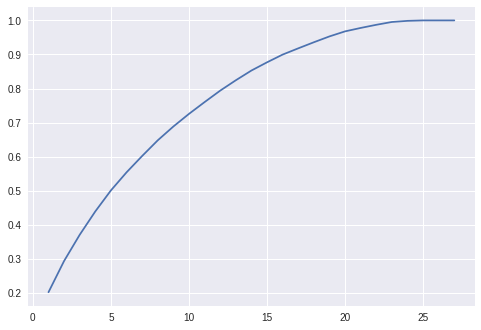

In [218]:

var = []
n = len(X.columns)
for i in range(1,n):
    principal=PCA(n_components=i)
    principal.fit(Scaled_data)
    val = principal.explained_variance_ratio_
    con = sum(val)
    var.append(con)
    

x_ax = [i for i in range(1,n)]
plt.plot(x_ax,var)


In [219]:
principal=PCA(n_components=19)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn.metrics import roc_auc_score, roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(x,y)


def without_thres_result(y_test,y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    name_labels = ['no','yes']
    f = sns.heatmap(matrix, annot=True,  cbar=True,xticklabels=name_labels, yticklabels=name_labels )
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    fig = f.get_figure()
    print(f'recall:{recall_score(y_test, y_pred)}')
    print(f'precision:{precision_score(y_test, y_pred)}')
    print(f'F1-Score:{f1_score(y_test, y_pred)}')
    print(f'accuracy:{(matrix[1][1]+matrix[0][0])/np.sum(matrix)}')

def ROC_curve(pred_prob,label):
    auc_score = roc_auc_score(y_test, pred_prob[:,1])
    print("AUC score: ",auc_score)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    plt.style.use('seaborn')
    plt.plot(fpr, tpr, linestyle='--',color='green', label=label)
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    j = tpr-fpr
    ix = np.argmax(j)
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    plt.show()
    print(f'Best Threshold:{thresholds[ix]}')

def thres_result(y_test,pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
    optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), thresholds)), key=lambda i: i[0], reverse=True)[0][1]
    roc_pred = [1 if i >= optimal_proba_cutoff else 0 for i in pred_prob[:, -1]]
    matrix = confusion_matrix(y_test, roc_pred)
    name_labels = ['no','yes']
    f = sns.heatmap(matrix, annot=True,  cbar=True,xticklabels=name_labels, yticklabels=name_labels )
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    fig = f.get_figure()
    print(f'recall:{recall_score(y_test, roc_pred)}')
    print(f'precision:{precision_score(y_test, roc_pred)}')
    print(f'F1-Score:{f1_score(y_test, roc_pred)}')
    print(f'accuracy:{(matrix[1][1]+matrix[0][0])/np.sum(matrix)}')

In [221]:
from sklearn import tree

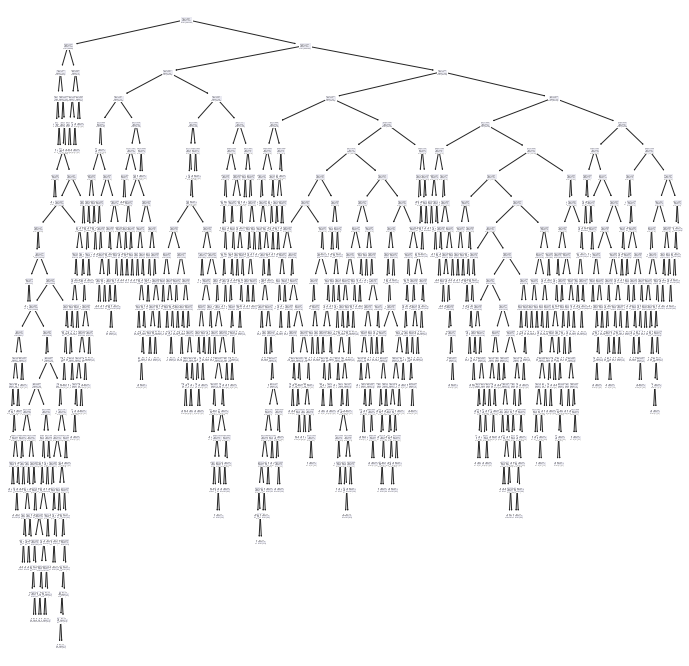

In [222]:
DTC = tree.DecisionTreeClassifier(random_state=0)
DTC.fit(X_train,y_train)
plt.figure(figsize=(12,12))
tree.plot_tree(DTC)
plt.show()

In [223]:
y_pred = DTC.predict(X_test)
accuracy_score(y_test,y_pred)

0.664

In [224]:
label = 'DecisionTree'
pred_prob = DTC.predict_proba(X_test)

recall:0.5405982905982906
precision:0.506
F1-Score:0.5227272727272726
accuracy:0.664


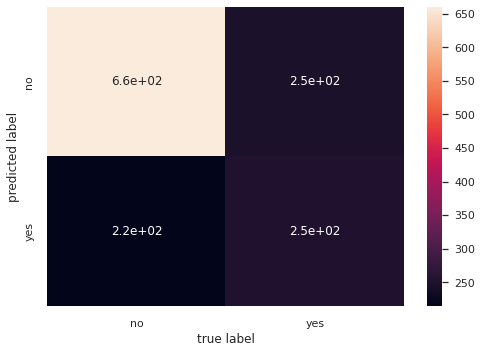

In [225]:
without_thres_result(y_test,y_pred)

AUC score:  0.6341359699959479


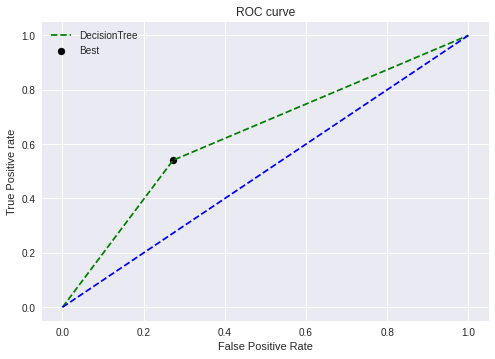

Best Threshold:1.0


In [226]:
ROC_curve(pred_prob,label)

recall:0.5405982905982906
precision:0.506
F1-Score:0.5227272727272726
accuracy:0.664


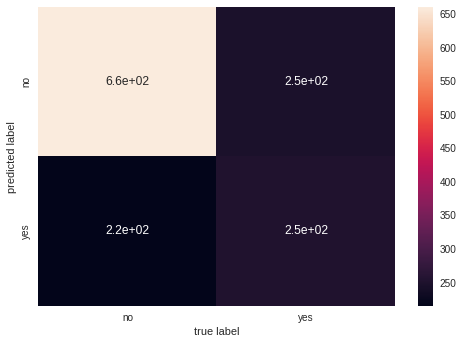

In [227]:
thres_result(y_test,pred_prob)

In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [229]:
#using grid search finding best parameters
param_dict = {'criterion':['gini'],'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,11,None]}
clf = GridSearchCV(DecisionTreeClassifier(),param_grid=param_dict,cv=8,n_jobs=-1)

In [230]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
8 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn(some_

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            None]})

In [231]:
j = clf.best_params_                           
k = j['max_leaf_nodes']
j

{'criterion': 'gini', 'max_leaf_nodes': 11}

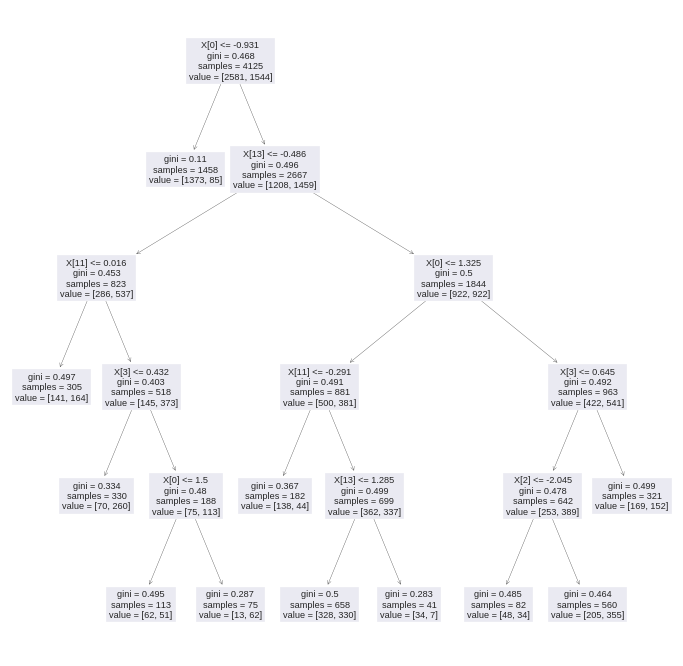

In [232]:
Best_DTC = tree.DecisionTreeClassifier(random_state=0,max_leaf_nodes=k)
Best_DTC.fit(X_train,y_train)
plt.figure(figsize=(12,12))
tree.plot_tree(Best_DTC)
plt.show()

In [233]:
y_pred = Best_DTC.predict(X_test)
accuracy_score(y_test,y_pred)

0.6807272727272727

recall:0.7029914529914529
precision:0.5230524642289348
F1-Score:0.5998176845943481
accuracy:0.6807272727272727


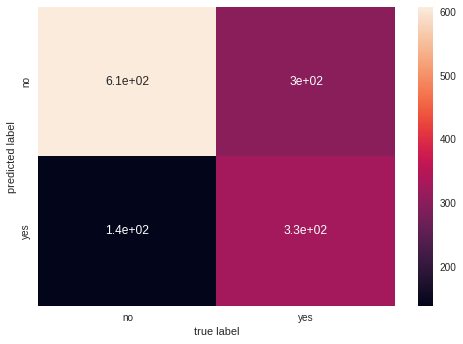

In [234]:
without_thres_result(y_test,y_pred)

AUC score:  0.755821294961317


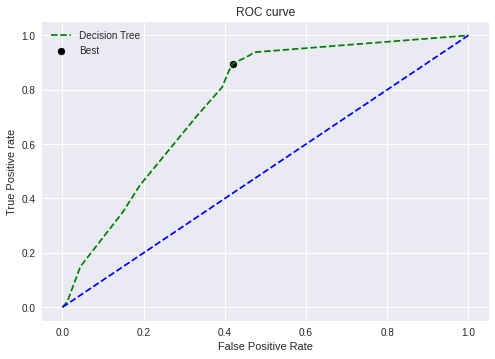

Best Threshold:0.4146341463414634


In [235]:
label = 'Decision Tree'
pred_prob = Best_DTC.predict_proba(X_test)
ROC_curve(pred_prob,label)

recall:0.8952991452991453
precision:0.5244055068836045
F1-Score:0.6614048934490924
accuracy:0.688


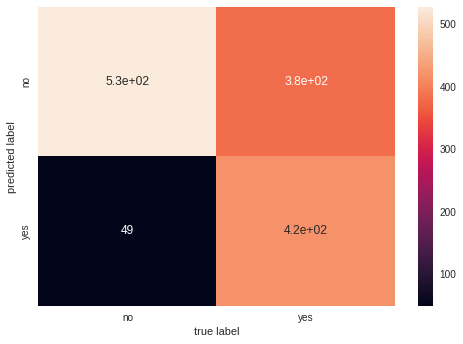

In [236]:
thres_result(y_test,pred_prob)

**Random Forest**

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
RFC = RandomForestClassifier(n_estimators=50,max_leaf_nodes=k)
RFC.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=11, n_estimators=50)

recall:0.5491452991452992
precision:0.5976744186046512
F1-Score:0.5723830734966593
accuracy:0.7207272727272728


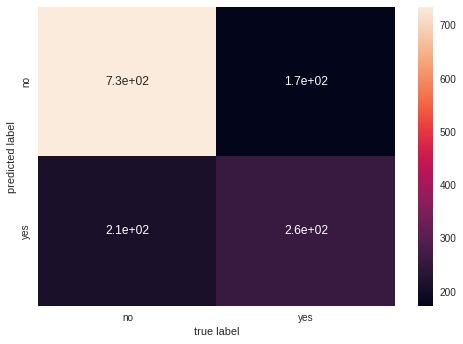

In [239]:
y_pred = RFC.predict(X_test)
without_thres_result(y_test,y_pred)

AUC score:  0.755821294961317


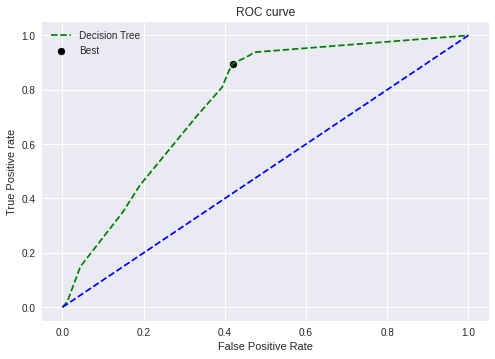

Best Threshold:0.4146341463414634


In [240]:
label = 'Decision Tree'
pred_prob = Best_DTC.predict_proba(X_test)
ROC_curve(pred_prob,label)

recall:0.8952991452991453
precision:0.5244055068836045
F1-Score:0.6614048934490924
accuracy:0.688


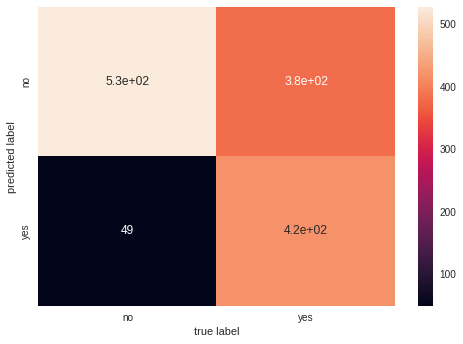

In [241]:
thres_result(y_test,pred_prob)

**Logistic Regression**

In [242]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-8,8,15), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-08, 1.38949549e-07, 1.93069773e-06, 2.68269580e-05,
       3.72759372e-04, 5.17947468e-03, 7.19685673e-02, 1.00000000e+00,
       1.38949549e+01, 1.93069773e+02, 2.68269580e+03, 3.72759372e+04,
       5.17947468e+05, 7.19685673e+06, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [243]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.7483579773854581


In [244]:
j = logreg_cv.best_params_                           
k = j['C']
p = j['penalty']
j

{'C': 1.0, 'penalty': 'l2'}

In [245]:
log_reg = LogisticRegression(penalty=p, dual=False, tol=0.0001, C=k, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0)
log_reg.fit(X_train,y_train)

LogisticRegression()

recall:0.7029914529914529
precision:0.5230524642289348
F1-Score:0.5998176845943481
accuracy:0.6807272727272727


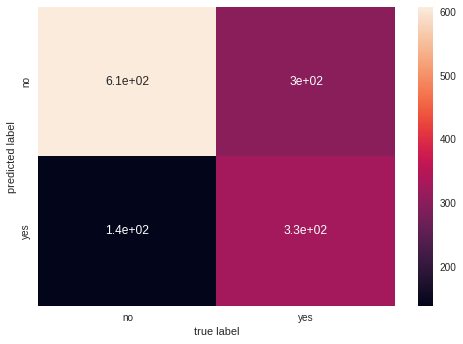

In [246]:
y_pred = clf.predict(X_test)
without_thres_result(y_test,y_pred)

AUC score:  0.8084791601880907


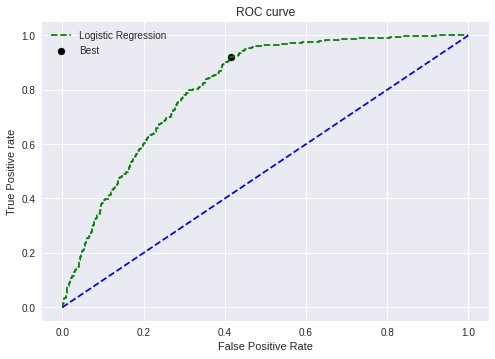

Best Threshold:0.31364011426793964


In [247]:
label = 'Logistic Regression'
pred_prob = log_reg.predict_proba(X_test)
ROC_curve(pred_prob,label)

recall:0.9209401709401709
precision:0.5340768277571252
F1-Score:0.6760784313725491
accuracy:0.6996363636363636


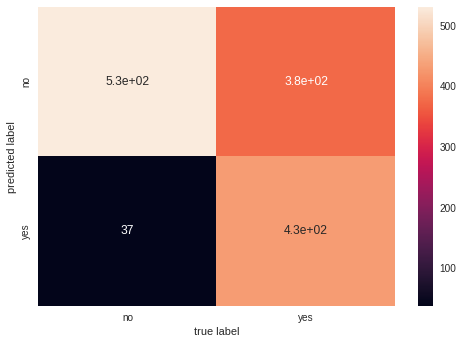

In [248]:
thres_result(y_test,pred_prob)

**SVM**

In [249]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   4.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   4.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   4.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   4.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.627 total time=   4.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.709 total time=   3.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.682 total time=   3.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=   3.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.693 total time=   3.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.713 total time=   3.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.736 total time=   2.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [250]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, gamma=0.0001, probability=True)


In [251]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
accuracy : 0.7432727272727273


In [252]:
j = grid.best_params_                           
k = j['C']
p = j['gamma']
j

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [253]:
best_svm = SVC(probability=True,C=k,gamma=p, kernel='rbf')
best_svm.fit(X_train,y_train)

SVC(C=100, gamma=0.0001, probability=True)

recall:0.7029914529914529
precision:0.5875
F1-Score:0.6400778210116731
accuracy:0.730909090909091


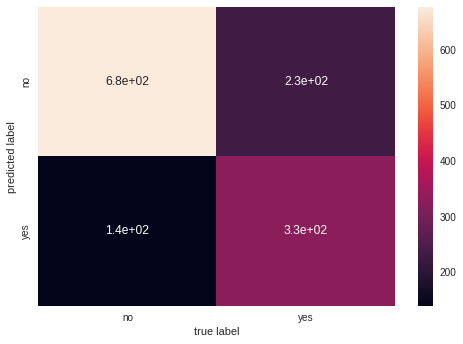

In [254]:
y_pred = best_svm.predict(X_test)
without_thres_result(y_test,y_pred)

AUC score:  0.8094097192774149


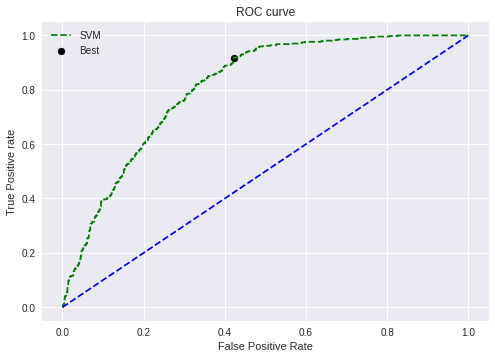

Best Threshold:0.24784593779224248


In [255]:
label = 'SVM'
pred_prob = best_svm.predict_proba(X_test)
ROC_curve(pred_prob,label)

recall:0.9166666666666666
precision:0.5283251231527094
F1-Score:0.6703125
accuracy:0.6930909090909091


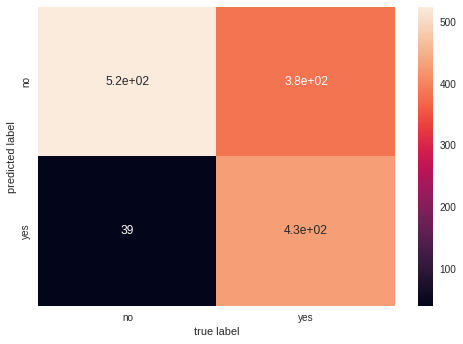

In [256]:
thres_result(y_test,pred_prob)

**KNN**

In [257]:
from sklearn.neighbors import KNeighborsClassifier

In [258]:
grid_params = {'n_neighbors':[7,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25],
                'weights':['uniform','distance'],
                'metric':['euclidean','manhattan',]}
knn_grid = GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=3,n_jobs=-1)
knn_grid.fit(X_train, y_train)

Fitting 3 folds for each of 68 candidates, totalling 204 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [7, 9, 11, 12, 13, 14, 15, 16, 17, 18,
                                         19, 20, 21, 22, 23, 24, 25],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [259]:
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)

{'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'distance'}
KNeighborsClassifier(metric='manhattan', n_neighbors=24, weights='distance')


In [260]:
j = knn_grid.best_params_                           
k = j['n_neighbors']
p = j['weights']
d = j['metric']
j

{'metric': 'manhattan', 'n_neighbors': 24, 'weights': 'distance'}

In [261]:
knn = KNeighborsClassifier(n_neighbors = k,weights=p,metric=d)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=24, weights='distance')

recall:0.6581196581196581
precision:0.5855513307984791
F1-Score:0.6197183098591549
accuracy:0.7250909090909091


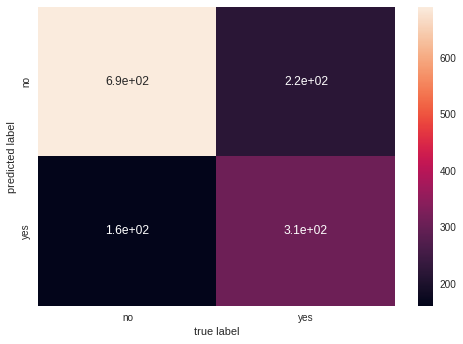

In [262]:
y_pred = knn.predict(X_test)
without_thres_result(y_test,y_pred)

AUC score:  0.7957081201292888


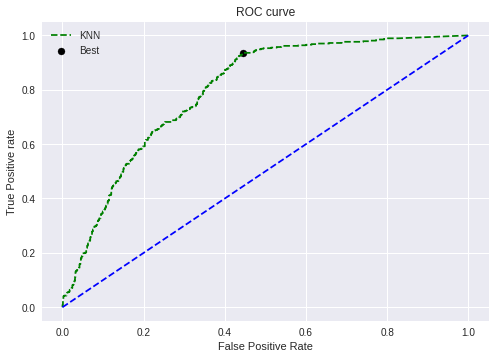

Best Threshold:0.2582283198383892


In [263]:
label = 'KNN'
pred_prob = knn.predict_proba(X_test)
ROC_curve(pred_prob,label)

recall:0.9358974358974359
precision:0.5201900237529691
F1-Score:0.6687022900763359
accuracy:0.6843636363636364


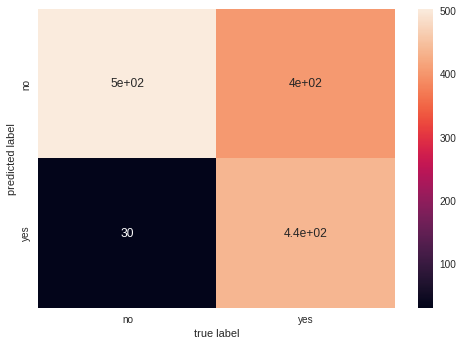

In [264]:
thres_result(y_test,pred_prob)

**AdaBoost**

In [265]:
from sklearn.ensemble import AdaBoostClassifier

In [266]:
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

parameters = {'base_estimator__max_depth':[i for i in range(2,7,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250],
              'learning_rate':[0.01,0.1]}

adbc = GridSearchCV(abc, parameters,verbose=3,scoring='f1',n_jobs=-1)
adbc.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [2, 4, 6],
                         'base_estimator__min_samples_leaf': [5, 10],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50, 250]},
             scoring='f1', verbose=3)

In [267]:
adbc.best_params_

{'base_estimator__max_depth': 2,
 'base_estimator__min_samples_leaf': 10,
 'learning_rate': 0.1,
 'n_estimators': 10}

In [268]:
best_abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth= 2,min_samples_leaf= 5),learning_rate= 0.1,n_estimators= 10)
best_abc.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         min_samples_leaf=5),
                   learning_rate=0.1, n_estimators=10)

recall:0.7072649572649573
precision:0.5544388609715243
F1-Score:0.6215962441314555
accuracy:0.7069090909090909


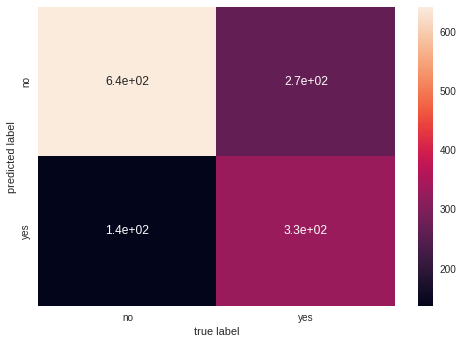

In [269]:
y_pred = best_abc.predict(X_test)
without_thres_result(y_test,y_pred)

AUC score:  0.7897501861118179


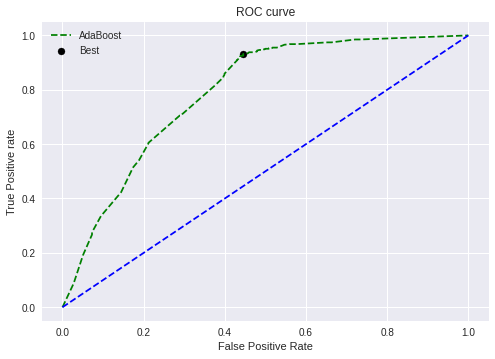

Best Threshold:0.43571591362666373


In [270]:
label = 'AdaBoost'
pred_prob = best_abc.predict_proba(X_test)
ROC_curve(pred_prob,label)

recall:0.9316239316239316
precision:0.5190476190476191
F1-Score:0.6666666666666667
accuracy:0.6829090909090909


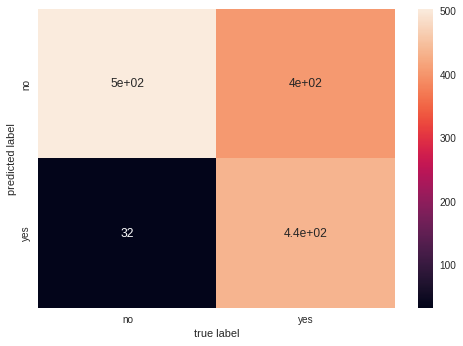

In [271]:
thres_result(y_test,pred_prob)

**Naive Bayes**

In [272]:
from sklearn.naive_bayes import GaussianNB

In [273]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

recall:0.46794871794871795
precision:0.5461346633416458
F1-Score:0.5040276179516686
accuracy:0.6865454545454546


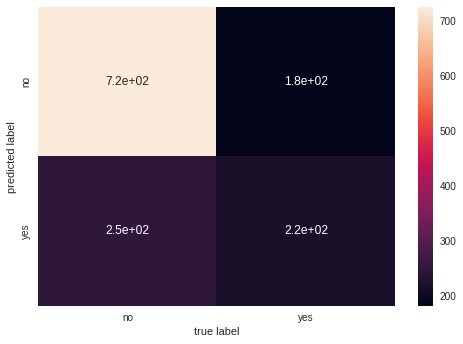

In [274]:
y_pred = gnb.predict(X_test)
without_thres_result(y_test,y_pred)

AUC score:  0.7661752372336716


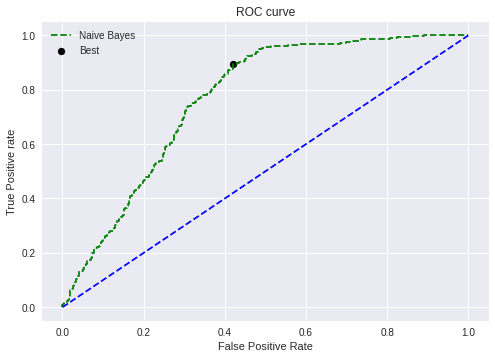

Best Threshold:0.26504031200747213


In [275]:
label = 'Naive Bayes'
pred_prob = gnb.predict_proba(X_test)
ROC_curve(pred_prob,label)

recall:0.8931623931623932
precision:0.5225
F1-Score:0.6593059936908517
accuracy:0.6858181818181818


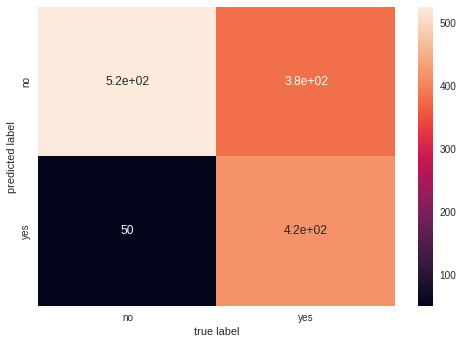

In [276]:
thres_result(y_test,pred_prob)

**ANN**

In [277]:
from sklearn.neural_network import MLPClassifier

In [278]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(15,10,5),(14,8),(12,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
ann_cv = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
ann_cv.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(15, 10, 5), (14, 8), (12,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [279]:
ann_cv.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (12,),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [280]:
ann = MLPClassifier(activation = 'relu',alpha= 0.0001,hidden_layer_sizes= (12,),learning_rate= 'constant',solver= 'adam',max_iter=100)
ann.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(12,), max_iter=100)

recall:0.6303418803418803
precision:0.6171548117154811
F1-Score:0.6236786469344608
accuracy:0.7410909090909091


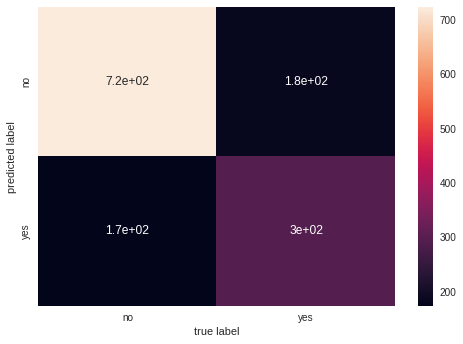

In [281]:
y_pred = ann.predict(X_test)
without_thres_result(y_test,y_pred)

AUC score:  0.8162204694729501


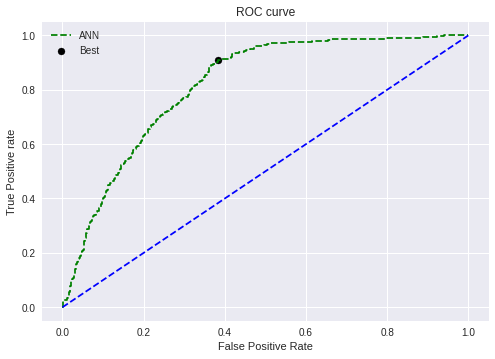

Best Threshold:0.2844304927609552


In [282]:
label = 'ANN'
pred_prob = ann.predict_proba(X_test)
ROC_curve(pred_prob,label)

recall:0.9081196581196581
precision:0.5498059508408797
F1-Score:0.684931506849315
accuracy:0.7156363636363636


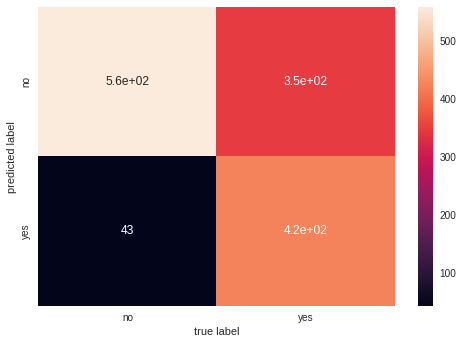

In [283]:
thres_result(y_test,pred_prob)